In [2]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [4]:
df = pd.read_csv('data2.csv')
df.head(5)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [45]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,3:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.95523876,  2.09777597,  0.65635897],
       [ 1.53094905,  2.44798852,  0.65635897],
       [ 1.12942801,  2.15613628,  0.65635897],
       [ 1.271543  ,  1.86437197,  0.65635897],
       [ 1.3126078 ,  1.6310228 ,  0.65635897],
       [ 0.76859251,  1.6310228 ,  0.65635897],
       [ 0.44670528,  1.39772948,  0.65635897],
       [ 0.12457862,  1.16449306,  0.65635897],
       [ 0.2242631 ,  1.6310228 ,  0.65635897],
       [-0.22890739,  1.3685726 , -0.30942637],
       [ 1.01138034,  1.28110403,  0.65635897],
       [ 0.87082451,  1.04789553,  0.65635897],
       [ 1.71607875,  1.39772948,  0.65635897],
       [ 1.47544769,  0.96045696,  0.65635897],
       [ 2.11931218,  1.16449306,  0.65635897],
       [ 1.81807323,  0.81474393,  0.65635897],
       [ 2.51910935,  1.98106673,  0.65635897],
       [ 1.89922981,  0.3486083 ,  0.65635897],
       [ 1.41568642,  0.523382  ,  0.65635897],
       [ 1.57715295,  0.1156253 , -1.27521172],
       [ 1.01292418,  0.23210904, -1.275

### Clustering datasets by their latitude and longtitude
#### Four clusters and 12 times iteration 


In [25]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)


[2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 3 1 1 1 1 0 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 0 0 3 3 3 0 3]


### Note that each row in our dataset represents a location, and therefore, each row is assigned a label.

In [26]:
df["Labels"] = labels
df.head(5)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Labels
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,2
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,2
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2


In [27]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.72641393, -0.50069523, -0.16326013],
       [-0.68929275,  0.2436832 , -1.04830186],
       [ 1.24742089,  1.35415584,  0.72178161],
       [-0.85401836, -1.26680951,  1.60682335]])

## Generate maps to visualize your neighborhoods and how they cluster together
#### Four clusters based on location distance

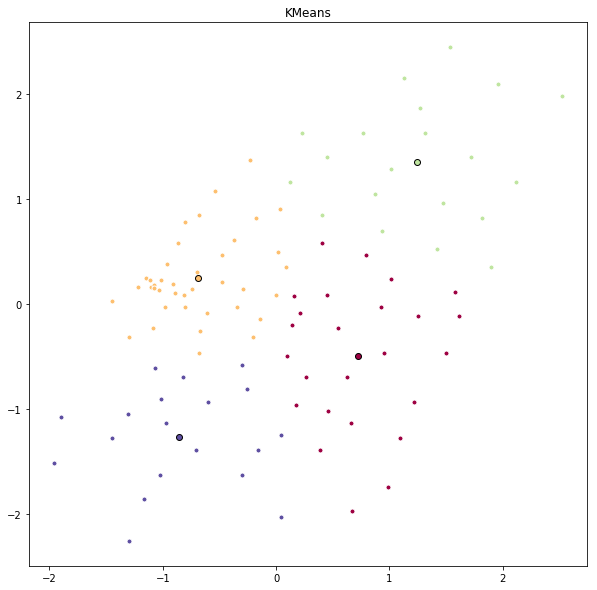

In [51]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)
# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[-1,1],[43, -74], [1, -3], [4, 4]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(cluster_dataset[my_members, 0], cluster_dataset[my_members, 1], 'w', markerfacecolor=col, marker='o',markersize=5)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
#ax.set_xticks(())

# remove y-axis ticks
#ax.set_yticks(())

# show the plot
plt.show()

In [42]:
X[my_members, 0]
X[my_members, 1]
cluster_center[0]
cluster_center[1]

-1.2668095095725789

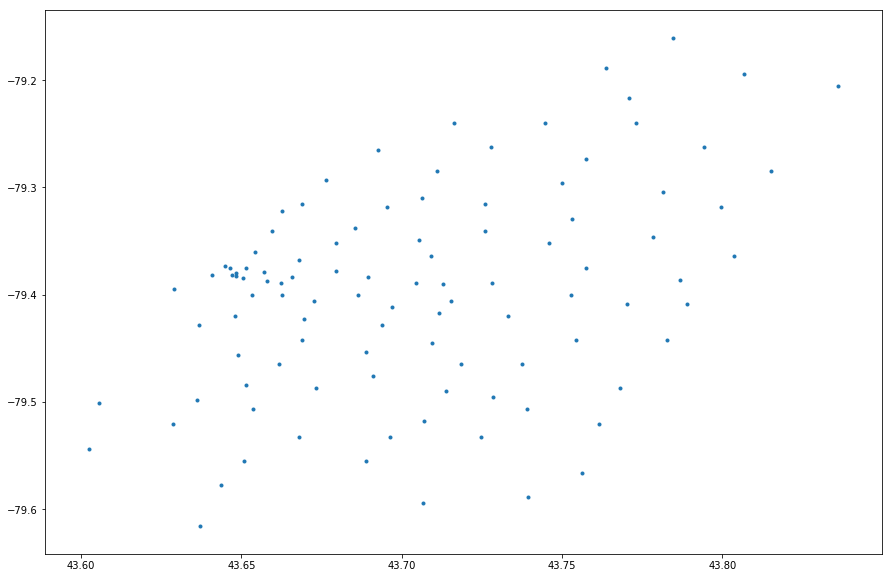

In [34]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [52]:
CLIENT_ID = 'QD53QUO1TPZQFYCTQISGQI322INX1QGMKBMR4ELITJZUULHX' # your Foursquare ID
CLIENT_SECRET = 'PCPLOBOUWFFXOH32I5S1ALRAP0XLSIF234DNOCZGXYUWIKTS' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [53]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

NameError: name 'toronto_data' is not defined